# Semantic Segmentation v2
Implement FCN-32s architecture for semantic segmentation.

[Paper](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)

## Download and load data:

In [1]:
# !wget https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz

--2021-01-14 00:35:10--  https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz
Resolving www.mimuw.edu.pl (www.mimuw.edu.pl)... 193.0.96.14
Connecting to www.mimuw.edu.pl (www.mimuw.edu.pl)|193.0.96.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307552213 (293M)
Saving to: ‘segmentation.npz.5’

segmentation.npz.5  100%[===================>] 293.30M  4.38MB/s    in 75s     

2021-01-14 00:36:27 (3.91 MB/s) - ‘segmentation.npz.5’ saved [307552213/307552213]



In [2]:
# Data is already preprocessed for VGG16, just load it.
import numpy as np
data = np.load('segmentation.npz')
train_x, train_y, test_x, test_y = data['train_x'], data['train_y'], data['test_x'], data['test_y']
del data

## Architecture to implement:

Visualization: FCN32s.png

- VGG16

- Conv2D, 7x7, 4096, relu, same

- Dropout 0.5

- Conv2D, 1x1, 4096, relu, same

- Dropout 0.5

- Conv2D nb_classes 1x1

- x = Conv2DTranspose(filters=nb_classes, kernel_size=(64, 64), strides=(33, 32), padding='same', activation='sigmoid')(x)

- Cropping2D

In [3]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Conv2DTranspose, Cropping2D
from tensorflow.keras.optimizers import Adadelta, SGD

nb_classes = 12
inputs = Input(shape=(360, 480, 3))
x = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
x = Conv2D(4096, (7,7), padding='same', activation='relu')(x.output)
x = Dropout(0.5)(x)
x = Conv2D(4096, (1,1), padding='same', activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(nb_classes, (1,1), padding='same', activation='relu')(x)
x = Conv2DTranspose(filters=nb_classes, kernel_size=(64, 64), strides=(33, 32), padding='same', activation='sigmoid')(x)
x = Cropping2D(cropping=((1,2), (0, 0)))(x)

model = Model(inputs=inputs, outputs=x)

for layer in model.layers[:15]:
  layer.trainable=False

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.3), metrics=['acc'])

In [4]:
# Use fit or fit_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

model.fit(train_datagen.flow(train_x, train_y, batch_size=3), epochs=65, shuffle=True, validation_data=(test_x,test_y))

Epoch 1/65
123/123 [==============================] - 33s 248ms/step - loss: 0.3834 - acc: 0.3355 - val_loss: 0.1366 - val_acc: 0.6338
Epoch 2/65
123/123 [==============================] - 26s 211ms/step - loss: 0.1132 - acc: 0.7291 - val_loss: 0.1038 - val_acc: 0.7642
Epoch 3/65
123/123 [==============================] - 26s 211ms/step - loss: 0.0883 - acc: 0.7966 - val_loss: 0.0925 - val_acc: 0.7865
Epoch 4/65
123/123 [==============================] - 26s 211ms/step - loss: 0.0769 - acc: 0.8255 - val_loss: 0.0795 - val_acc: 0.8278
Epoch 5/65
123/123 [==============================] - 26s 211ms/step - loss: 0.0700 - acc: 0.8427 - val_loss: 0.0710 - val_acc: 0.8501
Epoch 6/65
123/123 [==============================] - 26s 211ms/step - loss: 0.0663 - acc: 0.8508 - val_loss: 0.0687 - val_acc: 0.8521
Epoch 7/65
123/123 [==============================] - 26s 211ms/step - loss: 0.0618 - acc: 0.8600 - val_loss: 0.0681 - val_acc: 0.8502
Epoch 8/65
123/123 [==============================] - 2

In [5]:
model.optimizer.learning_rate = 0.2

In [6]:
model.fit(train_datagen.flow(train_x, train_y, batch_size=3), epochs=30, shuffle=True, validation_data=(test_x, test_y))

Epoch 1/30
123/123 [==============================] - 26s 214ms/step - loss: 0.0306 - acc: 0.9301 - val_loss: 0.0518 - val_acc: 0.8936
Epoch 2/30
123/123 [==============================] - 26s 211ms/step - loss: 0.0305 - acc: 0.9304 - val_loss: 0.0517 - val_acc: 0.8932
Epoch 3/30
123/123 [==============================] - 26s 211ms/step - loss: 0.0304 - acc: 0.9306 - val_loss: 0.0521 - val_acc: 0.8924
Epoch 4/30
123/123 [==============================] - 26s 210ms/step - loss: 0.0303 - acc: 0.9308 - val_loss: 0.0539 - val_acc: 0.8907
Epoch 5/30
123/123 [==============================] - 26s 211ms/step - loss: 0.0302 - acc: 0.9310 - val_loss: 0.0531 - val_acc: 0.8924
Epoch 6/30
123/123 [==============================] - 26s 211ms/step - loss: 0.0302 - acc: 0.9310 - val_loss: 0.0525 - val_acc: 0.8929
Epoch 7/30
123/123 [==============================] - 26s 210ms/step - loss: 0.0301 - acc: 0.9313 - val_loss: 0.0533 - val_acc: 0.8924
Epoch 8/30
123/123 [==============================] - 2

In [7]:
model.optimizer.learning_rate = 0.0075

In [9]:
model.fit(train_datagen.flow(train_x, train_y, batch_size=10), epochs=10, shuffle=True, validation_data=(test_x, test_y))

Epoch 1/10
37/37 [==============================] - 18s 490ms/step - loss: 0.0284 - acc: 0.9349 - val_loss: 0.0529 - val_acc: 0.8948
Epoch 2/10
37/37 [==============================] - 17s 470ms/step - loss: 0.0284 - acc: 0.9351 - val_loss: 0.0529 - val_acc: 0.8949
Epoch 3/10
37/37 [==============================] - 18s 486ms/step - loss: 0.0284 - acc: 0.9349 - val_loss: 0.0529 - val_acc: 0.8949
Epoch 4/10
37/37 [==============================] - 17s 470ms/step - loss: 0.0284 - acc: 0.9350 - val_loss: 0.0529 - val_acc: 0.8950
Epoch 5/10
37/37 [==============================] - 17s 470ms/step - loss: 0.0284 - acc: 0.9350 - val_loss: 0.0529 - val_acc: 0.8949
Epoch 6/10
37/37 [==============================] - 17s 469ms/step - loss: 0.0283 - acc: 0.9351 - val_loss: 0.0529 - val_acc: 0.8949
Epoch 7/10
37/37 [==============================] - 17s 469ms/step - loss: 0.0283 - acc: 0.9349 - val_loss: 0.0529 - val_acc: 0.8949
Epoch 8/10
37/37 [==============================] - 17s 471ms/step - 

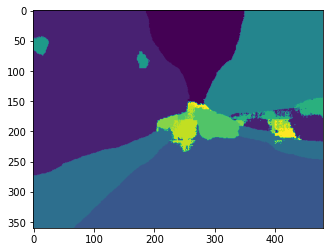

In [10]:
import matplotlib.pyplot as plt
pred = model.predict(np.expand_dims(test_x[0], axis=0))[0].argmax(axis=2)
plt.imshow(pred)

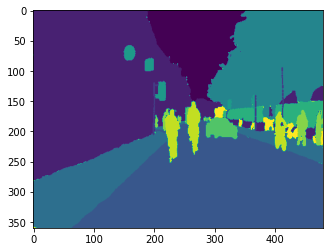

In [11]:
plt.imshow(test_y[0].argmax(axis=2))

## Save the trained model

In [14]:
model.save('model_410952', save_format='h5')

## Load the trained model and evaluate it on the test set

In [16]:
from tensorflow.keras.models import load_model
model_r = load_model('model_410952')

In [17]:
pixel_acc = 0
for i in range(len(test_y)):
  pixel_acc += (model_r.predict(np.expand_dims(test_x[i], axis=0))[0].argmax(axis=2)==test_y[i].argmax(axis=2)).sum()/(360*480)
pixel_acc = pixel_acc/len(test_y)

In [18]:
pixel_acc

0.8947762536670336

## Submission
You need to send by the deadline:
- the trained model with architecture and weights (as YourFirstName_YourSourname_Indeks.h5 file)
- and jupyter notebook (ipynb file) with all outputs and training logs (as YourFirstName_YourSourname_Indeks.ipynb file). The trained model should be reproducible by running Runtime -> Run all.

You should be able to train the model with batch_size=3. In case of problems, feel free to change Conv2D 4096->2048. Such an architecture should obtain at least 89.5% pixel accuracy on the test set.

Please remember that typically we use different metrics for semantic segmentation.